In [165]:
import pandas as pd

df = pd.read_csv('data/preprocessed_training_UNSW_NB15.csv')

In [166]:
df.columns

Index(['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl',
       'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit',
       'swin', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean', 'dmean',
       'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm',
       'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'ct_ftp_cmd', 'ct_flw_http_mthd',
       'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports', 'label',
       'is_ftp_login_1', 'is_ftp_login_2'],
      dtype='object')

In [167]:
df.head()

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,ct_dst_sport_ltm,ct_dst_src_ltm,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label,is_ftp_login_1,is_ftp_login_2
0,1.833334e-07,0.000094,0.0,0.000033,0.0,0.090909,0.996078,0.0,0.034238,0.0,...,0.0,0.016129,0.0,0.0,0.000000,0.016393,0.0,0,0.0,0.0
1,1.333334e-07,0.000094,0.0,0.000121,0.0,0.125000,0.996078,0.0,0.167236,0.0,...,0.0,0.016129,0.0,0.0,0.000000,0.016393,0.0,0,0.0,0.0
2,8.333335e-08,0.000094,0.0,0.000073,0.0,0.200000,0.996078,0.0,0.162187,0.0,...,0.0,0.032258,0.0,0.0,0.000000,0.032787,0.0,0,0.0,0.0
3,1.000000e-07,0.000094,0.0,0.000061,0.0,0.166667,0.996078,0.0,0.113895,0.0,...,0.0,0.032258,0.0,0.0,0.016949,0.032787,0.0,0,0.0,0.0
4,1.666667e-07,0.000094,0.0,0.000146,0.0,0.100000,0.996078,0.0,0.161427,0.0,...,0.0,0.032258,0.0,0.0,0.016949,0.032787,0.0,0,0.0,0.0


In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   dur               82332 non-null  float64
 1   spkts             82332 non-null  float64
 2   dpkts             82332 non-null  float64
 3   sbytes            82332 non-null  float64
 4   dbytes            82332 non-null  float64
 5   rate              82332 non-null  float64
 6   sttl              82332 non-null  float64
 7   dttl              82332 non-null  float64
 8   sload             82332 non-null  float64
 9   dload             82332 non-null  float64
 10  sloss             82332 non-null  float64
 11  dloss             82332 non-null  float64
 12  sinpkt            82332 non-null  float64
 13  dinpkt            82332 non-null  float64
 14  sjit              82332 non-null  float64
 15  djit              82332 non-null  float64
 16  swin              82332 non-null  float6

In [169]:
df['label'].value_counts()

label
1    45332
0    37000
Name: count, dtype: int64

In [170]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
import numpy as np


def preprocess_data(filepath):

    # Separate features and labels
    data = pd.read_csv(filepath)
    X = data.drop('label', axis=1).values
    y = data['label'].values

    # Handle class imbalance (if needed)
    X_majority = X[y == 0]
    y_majority = y[y == 0]
    X_minority = X[y == 1]
    y_minority = y[y == 1]

    X_minority_upsampled, y_minority_upsampled = resample(
        X_minority, y_minority,
        replace=True,
        n_samples=len(y_majority),
        random_state=42
    )

    X_balanced = np.vstack((X_majority, X_minority_upsampled))
    y_balanced = np.hstack((y_majority, y_minority_upsampled))

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(
        X_balanced, y_balanced, test_size=0.2, random_state=42
    )

    return X_train, X_test, y_train, y_test

In [171]:
filepath = 'data/preprocessed_training_UNSW_NB15.csv'
X_train, X_test, y_train, y_test = preprocess_data(filepath)
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")
print(f"Training label shape: {y_train.shape}")
print(f"Testing label shape: {y_test.shape}")

Training data shape: (59200, 36)
Testing data shape: (14800, 36)
Training label shape: (59200,)
Testing label shape: (14800,)


In [172]:
import torch
if torch.backends.mps.is_available():
    device = torch.device("mps")
else:
    device = torch.device("cpu")

In [173]:
import torch

# Convert all tensors to float
X_train = torch.tensor(X_train).float()
X_test = torch.tensor(X_test).float()
y_train = torch.tensor(y_train).float()
y_test = torch.tensor(y_test).float()

In [174]:
X_train[1].shape[0]

36

In [175]:

def create_client_data(num_clients=5):
    """Simulates datasets for clients."""
    client_data = []
    for _ in range(num_clients):
        client_data.append((X_train, y_train))
    return client_data

In [176]:
import torch.nn as nn

class clientsMod(nn.Module):
    def __init__(self, input_dim=36):
        super(clientsMod, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x

In [177]:
class MainModel(nn.Module):
    def __init__(self, input_dim=36):
        super(MainModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x

In [178]:
def federated_avg(models):
    """Aggregate model weights by averaging."""
    avg_model = models[0]
    with torch.no_grad():
        for key in avg_model.state_dict():
            avg_model.state_dict()[key].copy_(
                sum(model.state_dict()[key] for model in models) / len(models)
            )
    return avg_model

In [179]:
# Training function for clients
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

def train_client(model, data, epochs=5, lr=0.01):
    """Train a model on a single client's data."""
    model.train()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    loss_fn = nn.BCELoss()
    x, y = data
    dataset = TensorDataset(x, y)
    loader = DataLoader(dataset, batch_size=32, shuffle=True)

    for epoch in range(epochs):
        for batch_x, batch_y in loader:
            optimizer.zero_grad()
            y_pred = model(batch_x).squeeze()
            loss = loss_fn(y_pred, batch_y)
            loss.backward()
            optimizer.step()

    return model

In [180]:
# Evaluation function
def evaluate_model(model, data):
    """Evaluate model accuracy on a dataset."""
    model.eval()
    x, y = data
    with torch.no_grad():
        y_pred = model(x).squeeze()
        y_pred = (y_pred > 0.5).float()
        accuracy = (y_pred == y).float().mean().item()
    return accuracy

In [181]:
import matplotlib.pyplot as plt

def plot_accuracy_graph(global_epochs, global_accuracies, local_accuracies):
    """
    Plots a graph of epochs vs accuracy for global and local models.

    Args:
        global_epochs (int): Total number of global epochs.
        global_accuracies (list): List of global accuracies over the epochs.
        local_accuracies (list of lists): List of local accuracies for each client.
    """
    epochs = np.arange(1, global_epochs + 1)

    # Plot global accuracy
    plt.plot(epochs, global_accuracies,
             label='Global Accuracy', marker='o', color='b')

    # Plot local accuracies for each client
    for i, local_acc in enumerate(local_accuracies):
        plt.plot(epochs, local_acc,
                 label=f'Client {i + 1} Accuracy', linestyle='--')

    # Labels and title
    plt.xlabel('Global Epochs')
    plt.ylabel('Accuracy')
    plt.title('Federated Learning: Epochs vs Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

In [182]:

def federated_learning_simulation(num_clients=5, global_epochs=10, local_epochs=10):
    input_dim = 36  # Features
    client_data = create_client_data(
        num_clients=num_clients)

    # Initialize a model for each client
    client_models = [clientsMod(input_dim) for _ in range(num_clients)]

    # Global model
    global_model = MainModel(input_dim)

    global_accuracies = []
    # To store local accuracies per client
    local_accuracies = [[] for _ in range(num_clients)]

    for global_epoch in range(global_epochs):
        print(f"Global Epoch {global_epoch + 1}/{global_epochs}")

        # Step 1: Send global model to clients
        for model in client_models:
            model.load_state_dict(global_model.state_dict())

        # Step 2: Train local models and collect accuracies
        for i, model in enumerate(client_models):
            train_client(model, client_data[i], epochs=local_epochs)
            local_acc = evaluate_model(model, client_data[i])
            # Store local accuracy for each client
            local_accuracies[i].append(local_acc)
            # print(f"  Client {i + 1} Local Accuracy: {local_acc:.2f}")

        # Step 3: Aggregate models
        global_model = federated_avg(client_models)

        # Step 4: Evaluate global model on all clients
        global_acc = np.mean(
            [evaluate_model(global_model, client_data[i])
             for i in range(num_clients)]
        )
        print(f"  Global Model Accuracy: {global_acc:.2f}\n")

        # Store global accuracy
        global_accuracies.append(global_acc)

    # Plot the accuracy graph after the training loop
    plot_accuracy_graph(global_epochs, global_accuracies, local_accuracies)

    return global_model

Global Epoch 1/10
  Global Model Accuracy: 0.12

Global Epoch 2/10
  Global Model Accuracy: 0.16

Global Epoch 3/10
  Global Model Accuracy: 0.22

Global Epoch 4/10
  Global Model Accuracy: 0.29

Global Epoch 5/10
  Global Model Accuracy: 0.34

Global Epoch 6/10
  Global Model Accuracy: 0.39

Global Epoch 7/10
  Global Model Accuracy: 0.42

Global Epoch 8/10
  Global Model Accuracy: 0.48

Global Epoch 9/10
  Global Model Accuracy: 0.47

Global Epoch 10/10
  Global Model Accuracy: 0.51



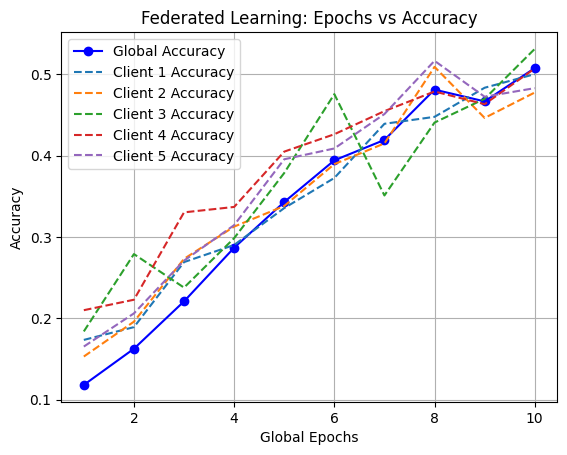

clientsMod(
  (fc1): Linear(in_features=36, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

In [183]:
federated_learning_simulation()